<a href="https://colab.research.google.com/github/hbhb0311/Visualization/blob/main/PulsarStar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

동적 그래프 확인 링크 - https://colab.research.google.com/drive/1fhses_oBHAOkJjOw-4sa3fF_1xjdT2pp?usp=sharing

In [ ]:
# 한글로 그래프 제목 입력해도 글씨 깨지지 않게 함

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 1. 데이터 확인

## 1-1. 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

plt.rc('font', family='NanumBarunGothic') 
%matplotlib inline

In [2]:
pulsar = pd.read_csv('./dataset/pulsar_data_train.csv')

In [3]:
pulsar.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


In [4]:
pulsar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                12528 non-null  float64
 1    Standard deviation of the integrated profile  12528 non-null  float64
 2    Excess kurtosis of the integrated profile     10793 non-null  float64
 3    Skewness of the integrated profile            12528 non-null  float64
 4    Mean of the DM-SNR curve                      12528 non-null  float64
 5    Standard deviation of the DM-SNR curve        11350 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           12528 non-null  float64
 7    Skewness of the DM-SNR curve                  11903 non-null  float64
 8   target_class                                   12528 non-null  float64
dtypes: float64(9)
memory usage: 881.0 KB


결측치 다수 존재하는 것으로 확인됨

## 1-2. 데이터 정제

### 열 이름 공백 제거

In [5]:
# 공백 제거한 열 이름을 다시 대입해줌
# strip 함수: 문자열 양쪽에 있는 모든 공백을 삭제

pulsar.columns = pulsar.columns.str.strip()
pulsar.columns

Index(['Mean of the integrated profile',
       'Standard deviation of the integrated profile',
       'Excess kurtosis of the integrated profile',
       'Skewness of the integrated profile', 'Mean of the DM-SNR curve',
       'Standard deviation of the DM-SNR curve',
       'Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

### 결측치 확인

In [6]:
nullgroup = pulsar.isnull().sum()
nullgroup

Mean of the integrated profile                     0
Standard deviation of the integrated profile       0
Excess kurtosis of the integrated profile       1735
Skewness of the integrated profile                 0
Mean of the DM-SNR curve                           0
Standard deviation of the DM-SNR curve          1178
Excess kurtosis of the DM-SNR curve                0
Skewness of the DM-SNR curve                     625
target_class                                       0
dtype: int64

In [7]:
fig = px.bar(x = nullgroup.index, y = nullgroup.values, text = nullgroup.values, 
labels={'x':'열 이름', 'y': '결측치의 개수'}, color_continuous_scale='deep', 
color = nullgroup.values)

fig.update_layout(title_text='각 열의 결측치 개수')

### 결측치 제거

In [8]:
pulsar = pulsar[pd.notnull(pulsar['Skewness of the DM-SNR curve'])]
pulsar = pulsar[pd.notnull(pulsar['Standard deviation of the DM-SNR curve'])]
pulsar = pulsar[pd.notnull(pulsar['Excess kurtosis of the integrated profile'])]

pulsar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9273 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Mean of the integrated profile                9273 non-null   float64
 1   Standard deviation of the integrated profile  9273 non-null   float64
 2   Excess kurtosis of the integrated profile     9273 non-null   float64
 3   Skewness of the integrated profile            9273 non-null   float64
 4   Mean of the DM-SNR curve                      9273 non-null   float64
 5   Standard deviation of the DM-SNR curve        9273 non-null   float64
 6   Excess kurtosis of the DM-SNR curve           9273 non-null   float64
 7   Skewness of the DM-SNR curve                  9273 non-null   float64
 8   target_class                                  9273 non-null   float64
dtypes: float64(9)
memory usage: 724.5 KB


# 2. 데이터 시각화

## 2-1. pulsar star의 유무 데이터 개수 확인

In [9]:
group = pulsar.groupby('target_class')['Mean of the integrated profile'].count()
# target_class로 groupby한 후 count 사용해 각 클래스의 개수를 알 수 있음

In [10]:
fig = px.bar(x = group.index, y = group.values, text = group.values, 
labels={'x':'Pulsar Star의 유/무', 'y': '개수'},
color_continuous_scale='blugrn', color = group.values)

fig.update_traces(textposition='outside')
fig.update_layout(title_text='Pulsar Star의 유/무')

## 2-2. 변수간 상관관계 파악

### 상관계수 파악 - heatmap

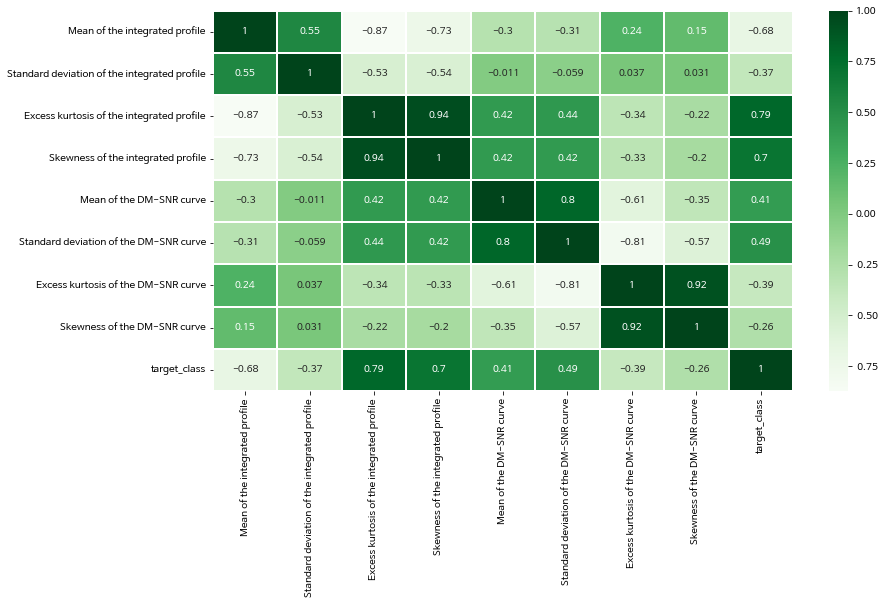

In [11]:
plt.figure(figsize = (13, 7))
a = sns.heatmap(pulsar.corr(), annot = True, cmap = 'Greens', linewidths= 1)
plt.show()

- 'Excess kurtosis of the integrated profile'
- 'Skewness of the integrated profile'
- 'Mean of the integrated profile'

    순으로 상관계수가 높은 것을 확인할 수 있음

### 각 변수별 target_class의 분포 확인

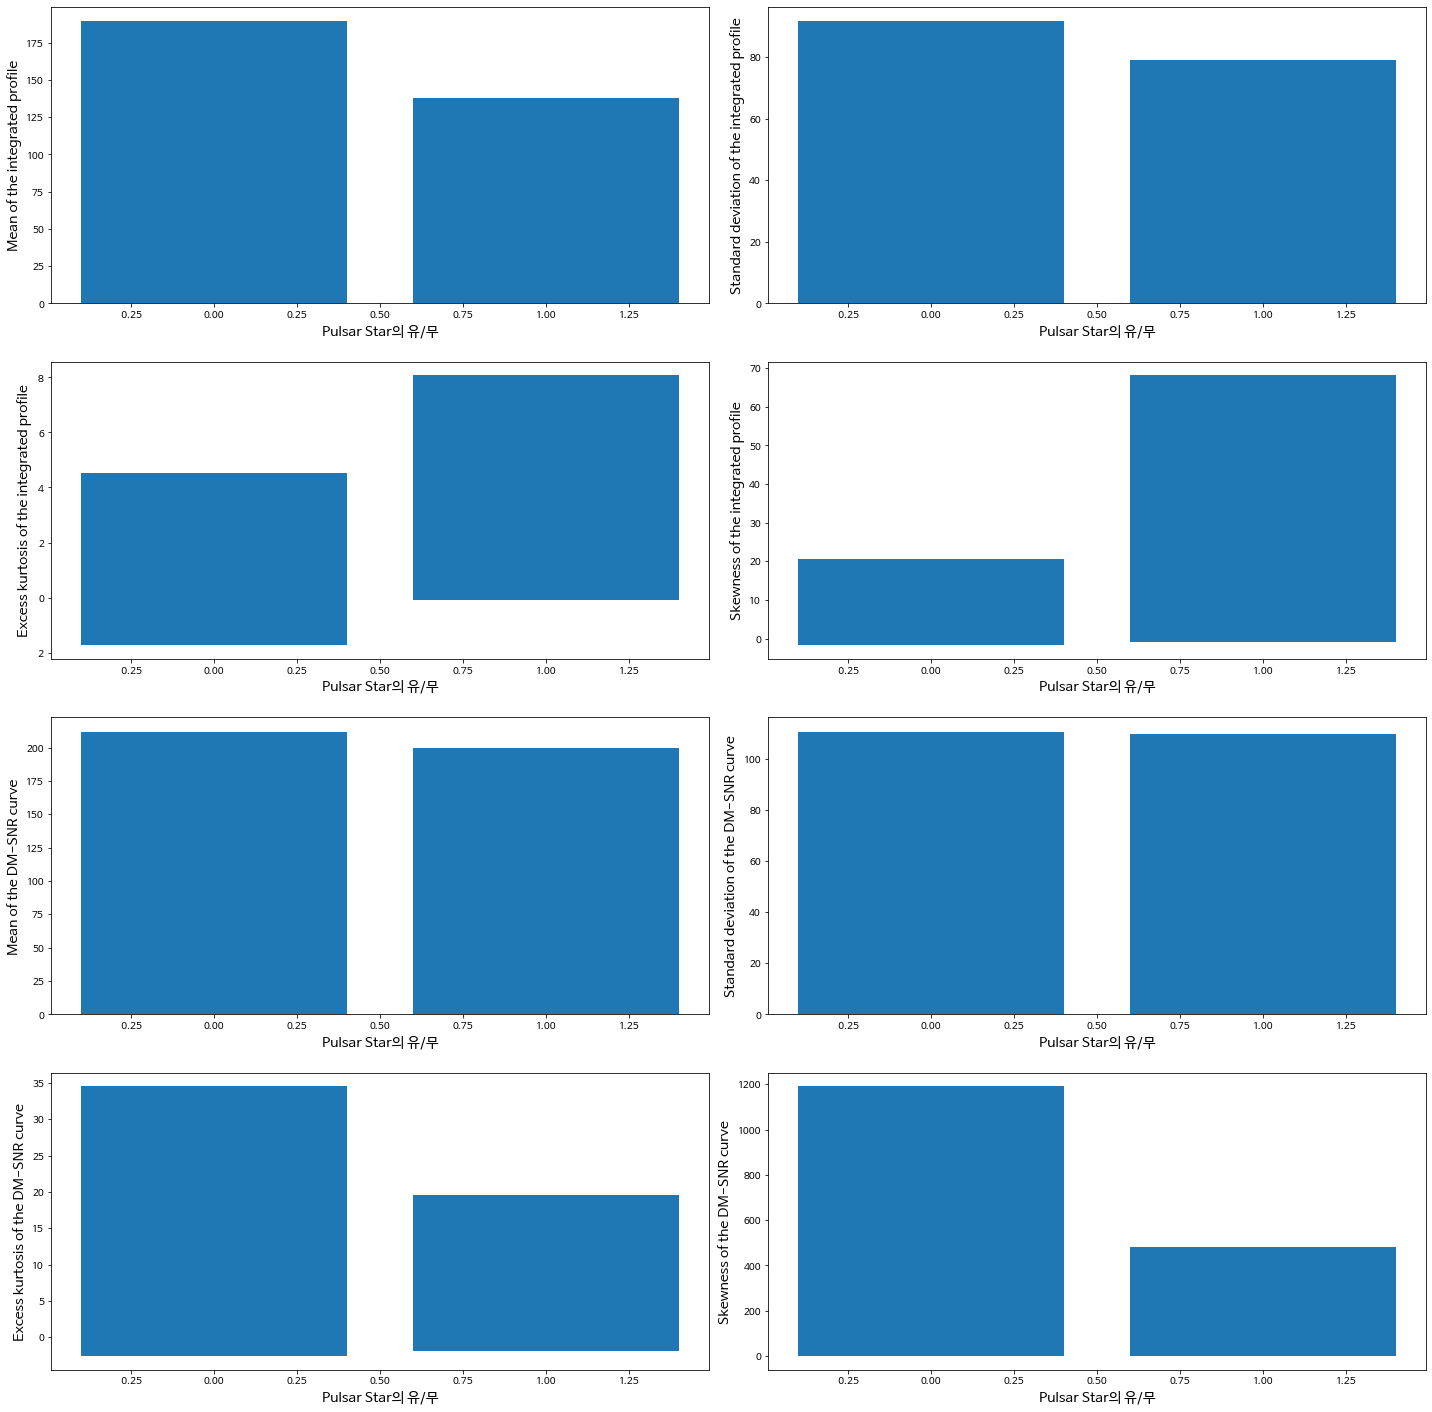

In [12]:
plt.figure(figsize = (20, 20))

for i in range(1,9):
  plt.subplot(4,2,i)
  plt.bar('target_class', pulsar.columns[i-1], data = pulsar)
  plt.xlabel('Pulsar Star의 유/무', fontsize = 14)
  plt.ylabel(pulsar.columns[i-1], fontsize = 14)

plt.tight_layout()
plt.show()

눈에 띄게 차이나는 변수는

- 'Skewness of the integrated profile'
- 'Excess kurtosis of the DM-SNR curve'
- 'Skewness of the DM-SNR curve'

    인 것을 확인할 수 있음

### 각 변수별 target_class의 중간값 차이 확인

In [13]:
targetgroup = pulsar.groupby('target_class').median()
targetgroup
# 각 변수별로 target_class에 따라 중간값이 어떻게 되어있는지 확인 가능

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve
target_class,,,,,,,,
0.0,117.421875,47.426259,0.185307,0.131233,2.633779,17.588673,8.761212,90.681156
1.0,53.753906,37.325661,2.988958,11.229038,34.090301,59.477365,1.853132,2.352651


In [14]:
targetgroup.loc[0] - targetgroup.loc[1]
# target_class가 0인 값들의 중간값에서 class가 1인 중간값들을 빼줌

Mean of the integrated profile                  63.667969
Standard deviation of the integrated profile    10.100598
Excess kurtosis of the integrated profile       -2.803651
Skewness of the integrated profile             -11.097805
Mean of the DM-SNR curve                       -31.456522
Standard deviation of the DM-SNR curve         -41.888693
Excess kurtosis of the DM-SNR curve              6.908080
Skewness of the DM-SNR curve                    88.328505
dtype: float64

In [15]:
(targetgroup.loc[0] - targetgroup.loc[1]).sort_values(ascending = False)
# ascending 이용해서 내림차순으로 정렬 -> 상위항목 쉽게 확인 가능

Skewness of the DM-SNR curve                    88.328505
Mean of the integrated profile                  63.667969
Standard deviation of the integrated profile    10.100598
Excess kurtosis of the DM-SNR curve              6.908080
Excess kurtosis of the integrated profile       -2.803651
Skewness of the integrated profile             -11.097805
Mean of the DM-SNR curve                       -31.456522
Standard deviation of the DM-SNR curve         -41.888693
dtype: float64

수치를 비교하면

- 'Skewness of the DM-SNR curve'
- 'Mean of the integrated profile'
- 'Standard deviation of the DM-SNR curve'

    순으로 차이가 큰 것을 확인할 수 있음

<br>

------
------

<br>

세 단계에서 가장 많이 도출된 변수는 (총 2번씩 도출됨)

- 'Skewness of the DM-SNR curve' (DM-SNR 곡선의 왜도)
- 'Mean of the integrated profile' (통합프로필의 평균)
- 'Skewness of the integrated profile' (통합프로필의 왜도)

## 2-3. target_class와 상관이 높다고 생각되는 변수만 시각화

In [16]:
fig = px.violin(pulsar, y='Skewness of the DM-SNR curve', 
                color='target_class', violinmode='overlay')

fig.update_traces(meanline_visible=True)
fig.update_layout(title_text='Pulsar Star 유무 별 DM-SNR 곡선의 왜도 분포')
fig.show()

Skewness of the DM-SNR curve 변수는 heatmap으로 상관계수를 확인했을 때, 그리 높은 수치는 아니었지만 violin plot으로 시각화를 해보니, target_class가 1인 경우에는 0에 가까운 값에 분포되는 경향이 있다는 것을 확인할 수 있다. → 다양한 방식으로 시각화를 해보는 것이 중요하다고 느낌

In [17]:
fig = px.violin(pulsar, y='Mean of the integrated profile', 
                color='target_class', violinmode='overlay')

fig.update_traces(meanline_visible=True)
fig.update_layout(title_text='Pulsar Star 유무 별 integrated profile의 평균 분포')
fig.show()

In [18]:
fig = px.violin(pulsar, y='Skewness of the integrated profile', 
                color='target_class', violinmode='overlay')

fig.update_traces(meanline_visible=True)
fig.update_layout(title_text='Pulsar Star 유무 별 integrated profile의 왜도 분포')
fig.show()